In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df=pd.read_excel('employment.xlsx')
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsExp,YearsProExp,Country,PreviousSalary,HaveWorkedWith,NumSkills,Employed
0,0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552,C++;Python;Git;PostgreSQL,4,0
1,1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932,C++;Python,2,0
5,5,5,<35,No,Master,1,Man,No,Dev,9,2,France,38915,JavaScript;Python;Docker;Git;MySQL,5,0
6,6,6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,7,7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319,C++;Python;Docker;Git,4,0
8,8,8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,Python;Git;PostgreSQL,3,0
9,9,9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


In [19]:
df_drop=df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'HaveWorkedWith', 'Gender', 'Country'], axis=1)

In [20]:
print(df_drop.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsExp', 'YearsProExp', 'PreviousSalary', 'NumSkills',
       'Employed'],
      dtype='object')


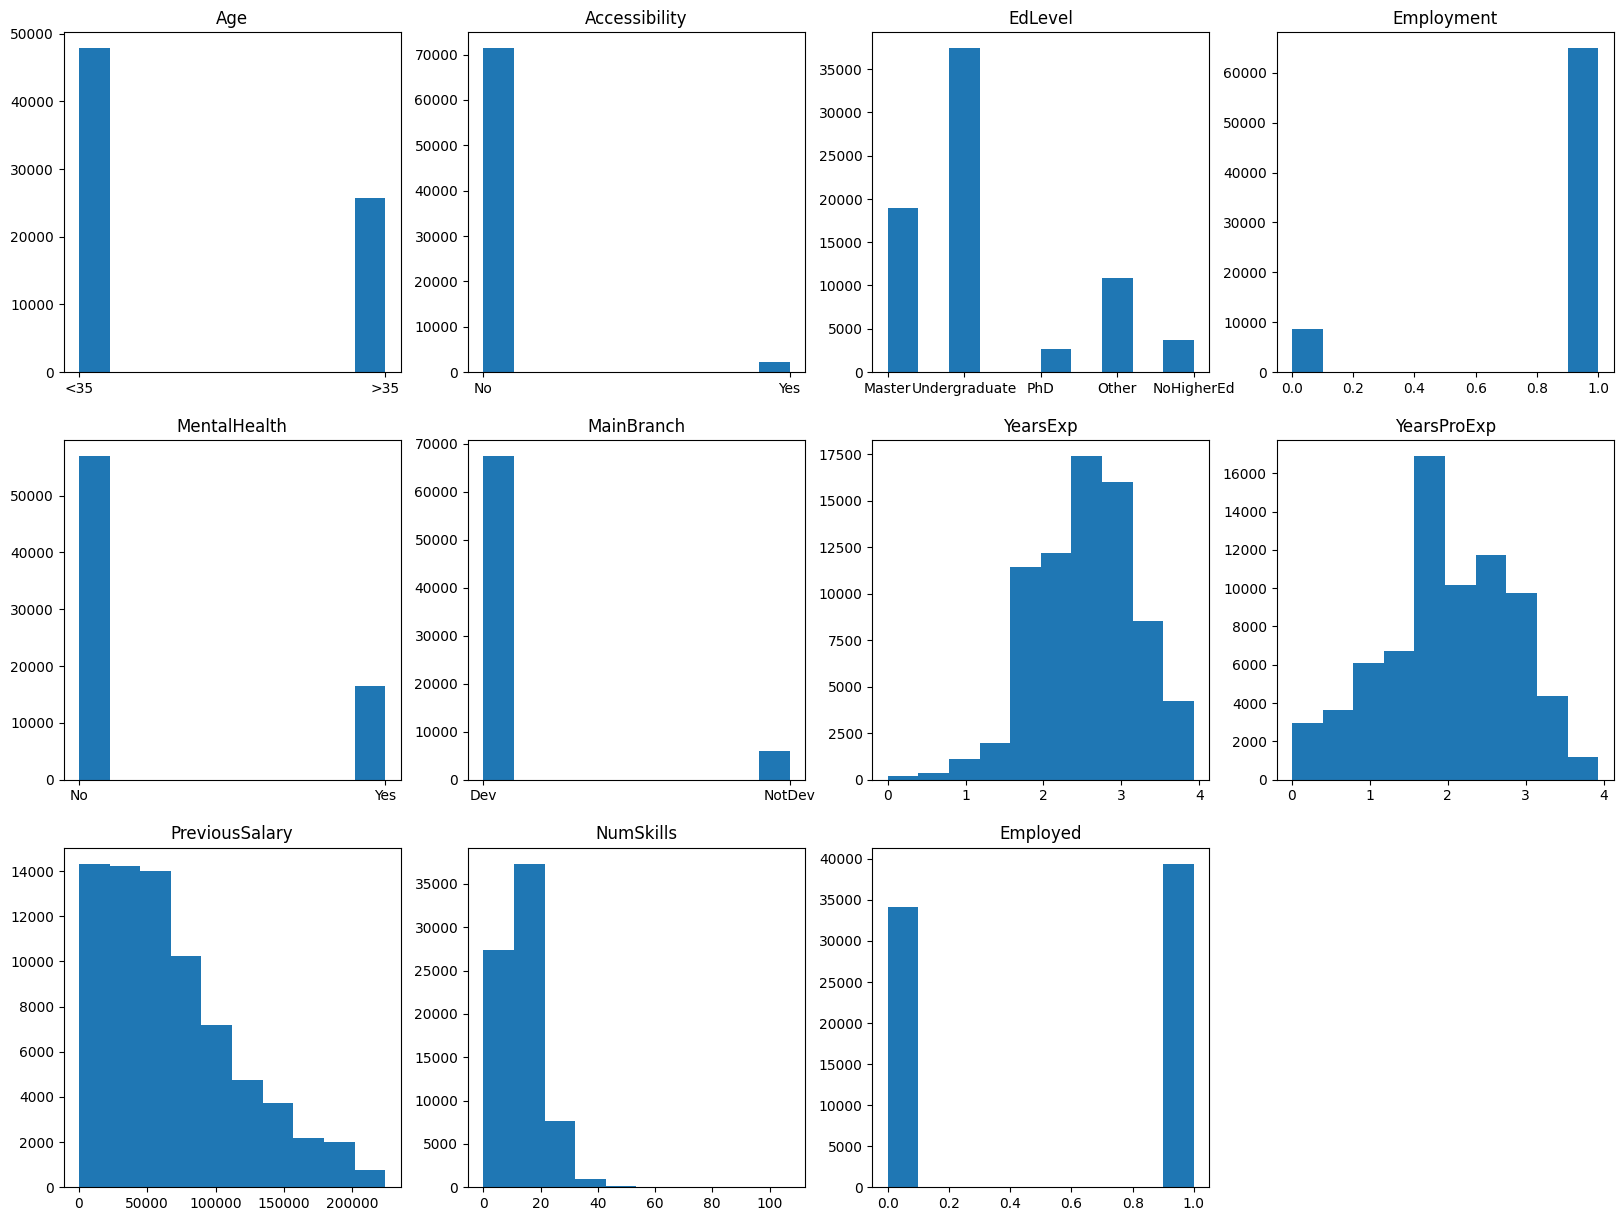

In [24]:
col=df_drop.columns
plt.subplots(figsize=(20,15))
plt.delaxes()
for i in range(len(df_drop.columns)):
    plt.subplot(3,4,i+1)
    plt.hist(df_drop[col[i]])
    plt.title(col[i])
plt.show()

In [22]:
df_drop["YearsExp"]=np.log(df_drop["YearsExp"]+1)
df_drop["YearsProExp"]=np.log(df_drop["YearsProExp"]+1)

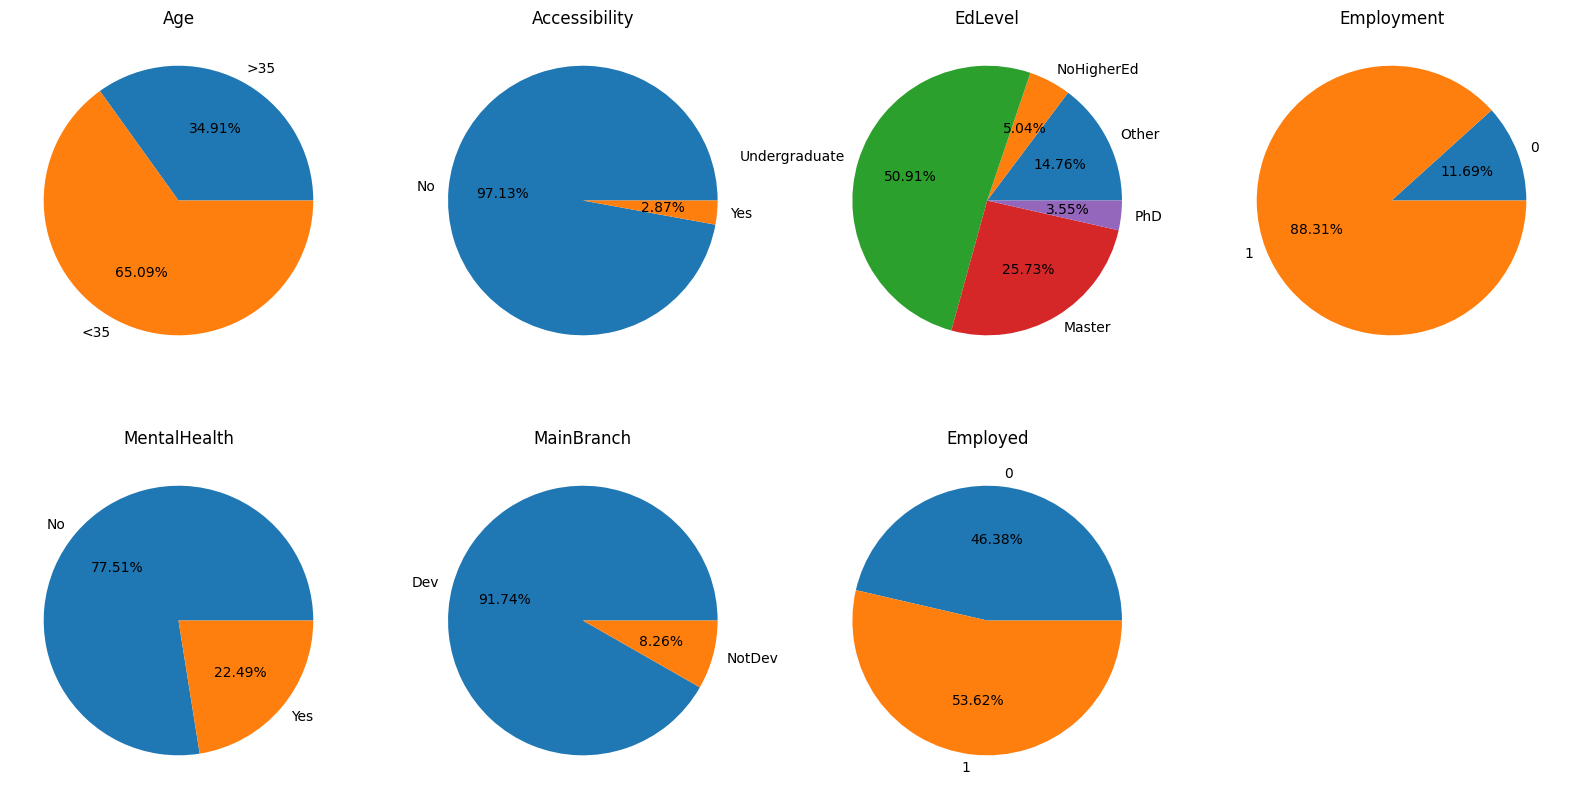

In [25]:
col_pie=['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth', 'MainBranch', 'Employed']
plt.subplots(figsize=(20,10))
plt.delaxes()
for i in range(len(col_pie)):
    plt.subplot(2,4,i+1)
    list_count=[]
    list_key=list(set(df_drop[col_pie[i]]))
    for sets in list_key:
        list_count.append(sum(df_drop[col_pie[i]]==sets))
    plt.pie(list_count, labels=list_key, autopct='%1.2f%%')
    plt.title(col_pie[i])
plt.show()

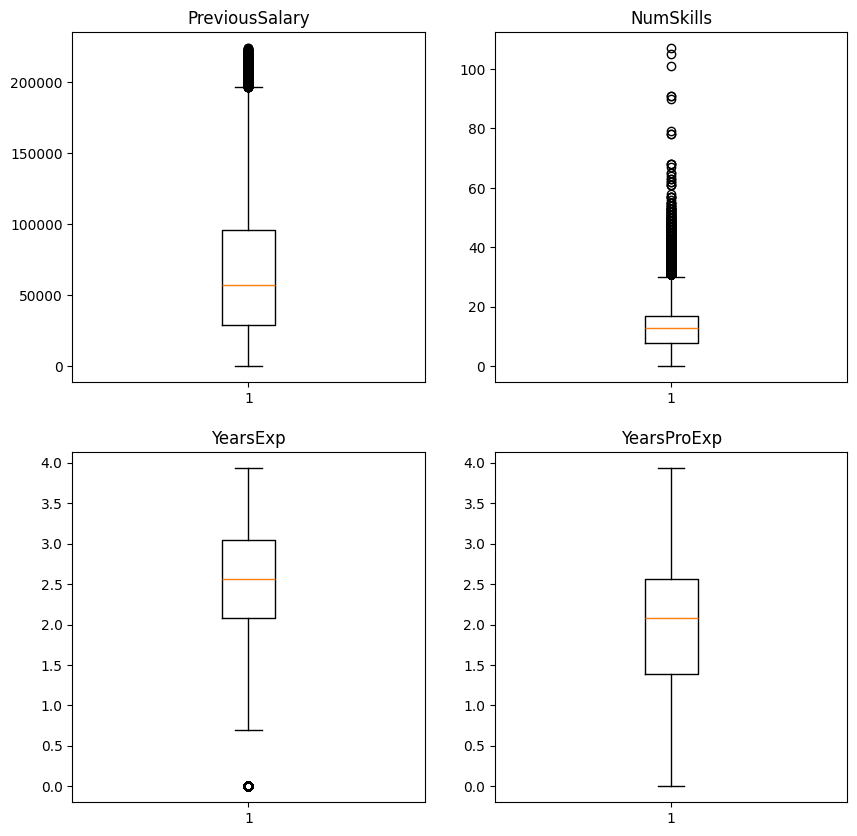

In [26]:
col_box=["PreviousSalary", "NumSkills", "YearsExp", "YearsProExp"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df_drop[col])
    plt.title(col)
    i+=1
plt.show()

In [27]:
df_drop.to_csv("EDA.csv")

#SEABORN

In [28]:
df = pd.read_csv('preprocessing.csv', index_col=0)
df.head(20)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed
0,1,4,7,4,51552,4,0
1,1,3,12,5,46482,12,1
2,1,4,15,6,77290,7,0
3,1,3,9,6,46135,13,0
4,0,5,40,30,160932,2,0
5,1,4,9,2,38915,5,0
6,0,4,26,18,77831,17,1
7,1,4,14,5,81319,4,0
8,0,3,39,21,68507,3,0
9,0,4,20,16,37752,6,0


In [29]:
#EDA
# Check the summary statistics of the dataframe
print(df.describe())

                Age       EdLevel      YearsExp   YearsProExp  PreviousSalary  \
count  73462.000000  73462.000000  73462.000000  73462.000000    73462.000000   
mean       0.650935      3.079824     14.218902      9.098377    67750.260611   
std        0.476678      0.861598      9.405172      7.960201    49488.142118   
min        0.000000      1.000000      0.000000      0.000000        1.000000   
25%        0.000000      3.000000      7.000000      3.000000    28839.000000   
50%        1.000000      3.000000     12.000000      7.000000    57588.000000   
75%        1.000000      4.000000     20.000000     12.000000    95979.000000   
max        1.000000      5.000000     50.000000     50.000000   224000.000000   

          NumSkills      Employed  
count  73462.000000  73462.000000  
mean      13.428221      0.536223  
std        7.057835      0.498690  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       13.000000      1.000000  
75%       17.00000

In [30]:
# Check for missing values
print(df.isnull().sum())
#Result -> tidak ada missing values

Age               0
EdLevel           0
YearsExp          0
YearsProExp       0
PreviousSalary    0
NumSkills         0
Employed          0
dtype: int64


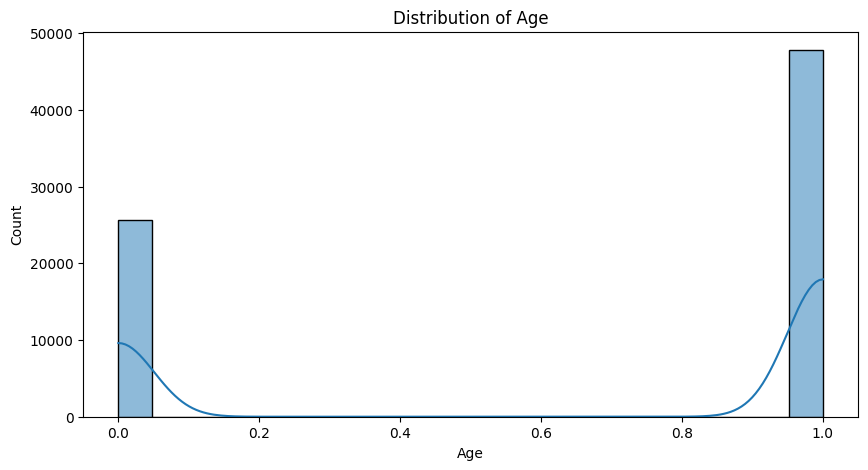

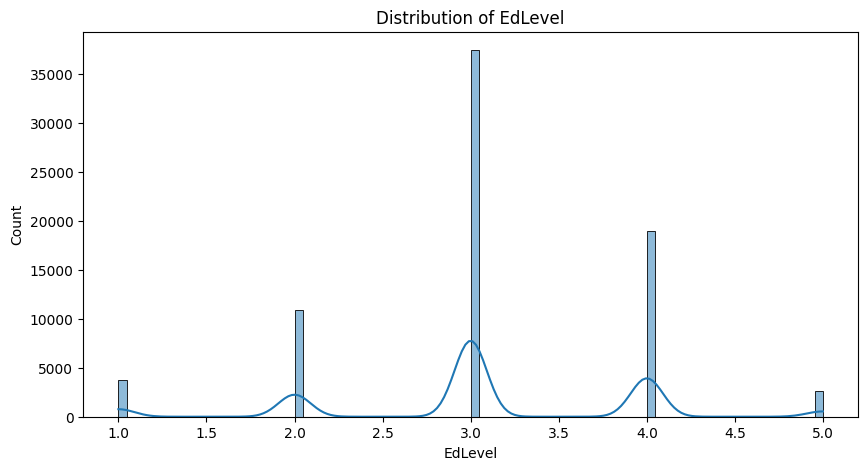

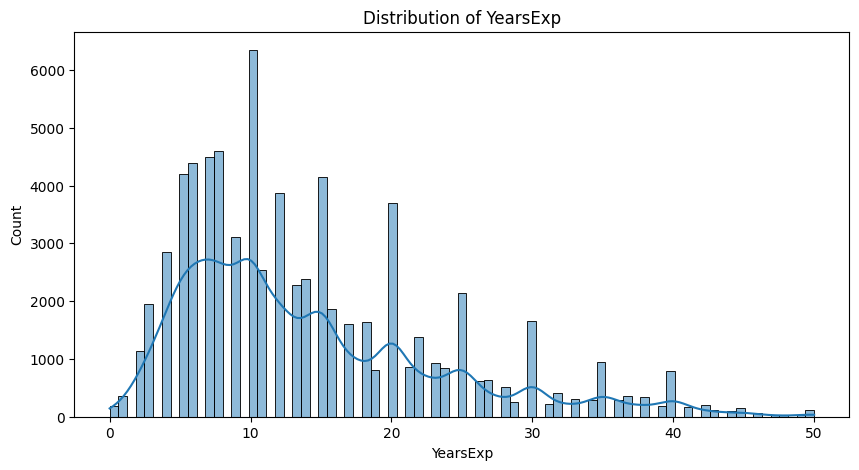

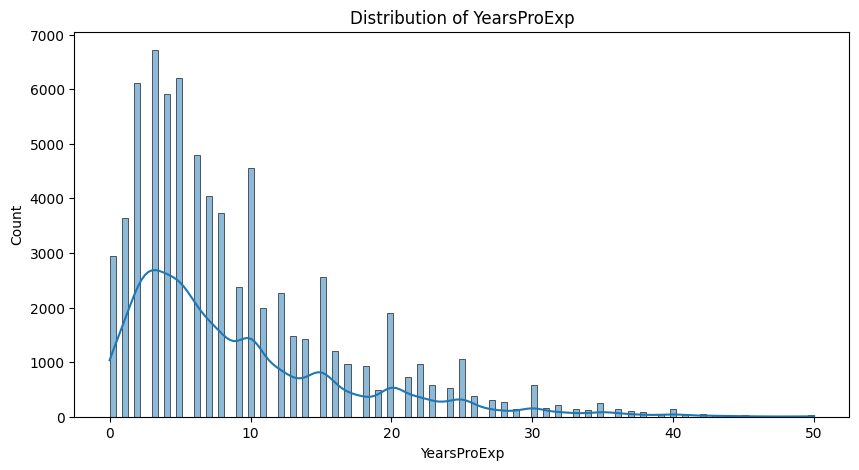

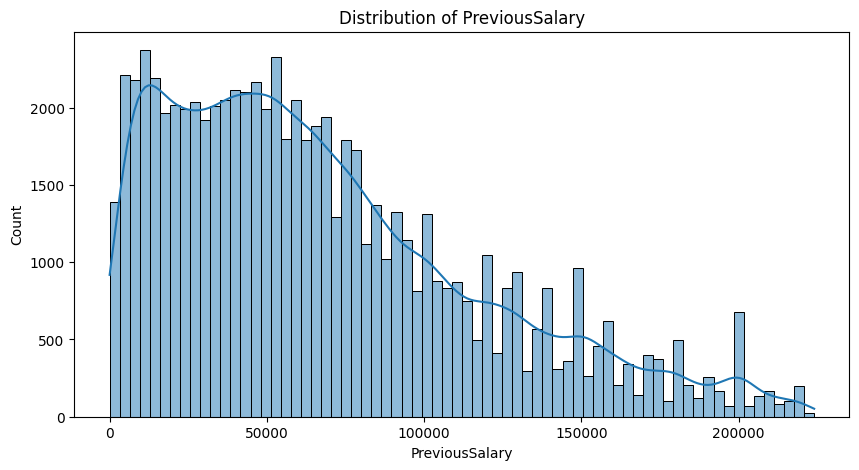

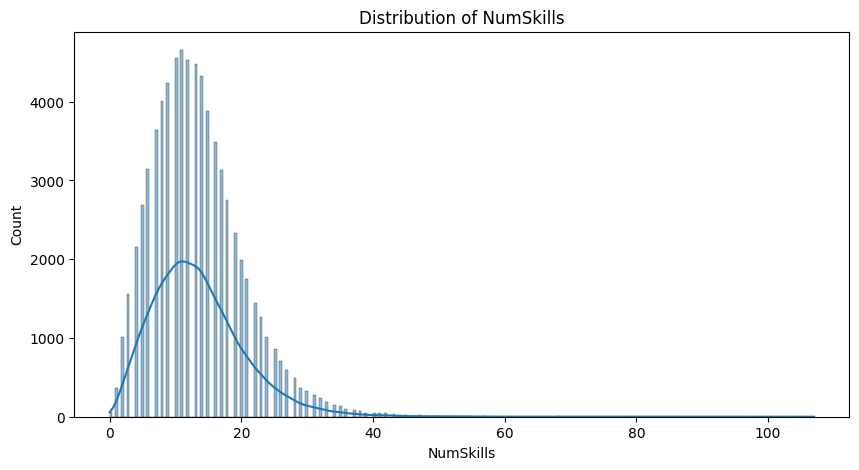

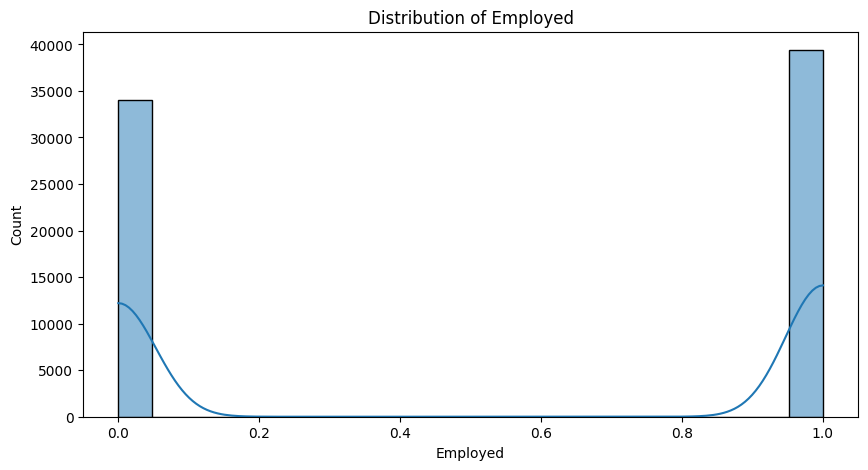

In [31]:
# Visualize the distribution of each feature
def plot_distribution(column_index=0):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=df.columns[column_index], kde=True)
    plt.title(f'Distribution of {df.columns[column_index]}')
    plt.show()
    
# plot_distribution(0)
#plot_distribution(1)
# plot_distribution(2)
# plot_distribution(3)
# plot_distribution(4)

#ini di uncomment kalau mau ngeplot semua column
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


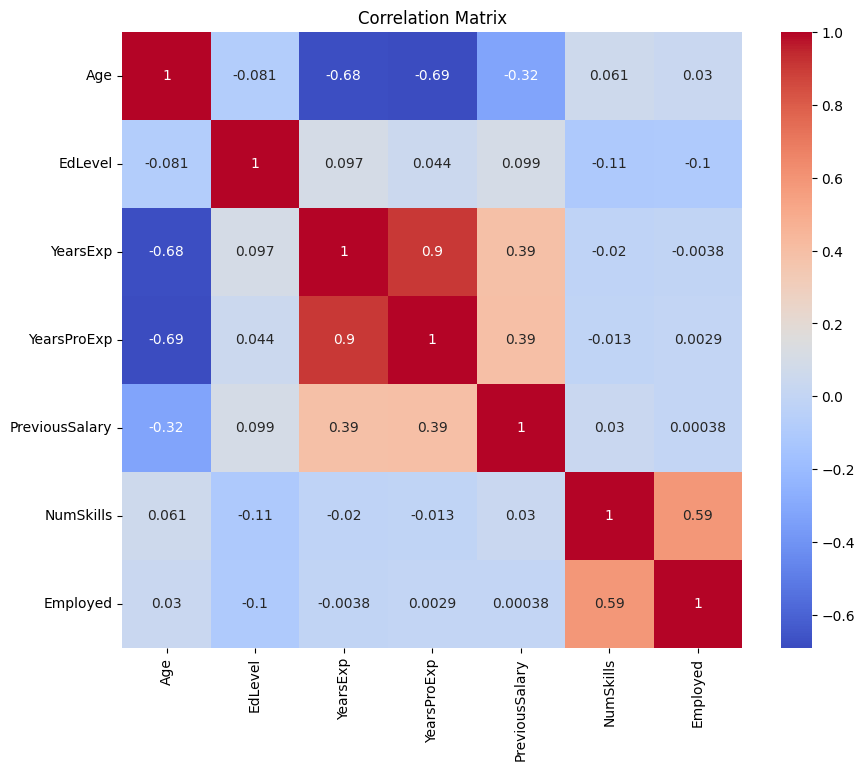

In [32]:
# Check the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()